In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

np.abs(-1)

1

In [27]:
def get_absLoss(fileLoss:str):
    df_lossOfModel = pd.read_csv(fileLoss)
    return np.abs(df_lossOfModel.iloc[:,0]-df_lossOfModel.iloc[:,1])

Seires1 = get_absLoss("./result/BiGRUpre.csv")

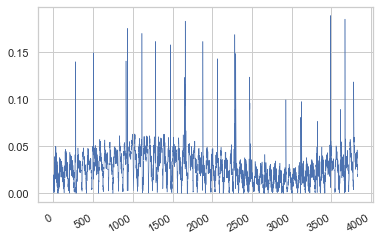

In [28]:
# Seires1[Seires1<0.2]
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
sns.set_theme(style="whitegrid")
# dataPlot = df_Ballycotton.loc[:,"Water_Level_LAT"]
sns.lineplot(x=range(len(Seires1[Seires1<0.2])),y=Seires1[Seires1<0.2], palette="tab10", linewidth=0.5,ax=ax)
# 将x轴斜过来显示更好看
fig.autofmt_xdate()

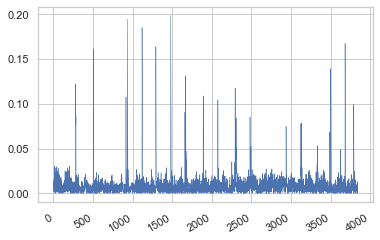

In [25]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
sns.set_theme(style="whitegrid")
# dataPlot = df_Ballycotton.loc[:,"Water_Level_LAT"]
sns.lineplot(x=range(len(Seires1[Seires1<0.2])),y=Seires1[Seires1<0.2], palette="tab10", linewidth=0.5,ax=ax)
# 将x轴斜过来显示更好看
fig.autofmt_xdate()
